In [1]:
import numpy as np
import pandas as pd
import re
import nltk
from bs4 import BeautifulSoup

#355c70 blue
#ff5a5e darker pink
#C06C85
#f67280 pink
#F8B195 light orange

In [2]:
#read in the csv file

df = pd.read_csv('subventions-accordees-et-refusees.csv', 
                     delimiter=';')
df.head(5)

,Numérodedossier,Annéebudgétaire,Collectivité,NomBénéficiaire,NuméroSiret,Objetdudossier,Montantvoté,Direction,Naturedesubvention,Secteursd'activités
0,2020_08341,2020,Ville de Paris,129 H PRODUCTIONS,44326922000036,Appel à projet Mois d'août de la culture 2020,3000,DAC,Projet,Culture & Arts;Education & formation;Vie et an...
1,2020_05033,2020,Ville de Paris,4 A 4 DIX HUIT,48909505900015,De Mômes et d'opérette : Des grottes de Lascau...,0,DAC,Non précisée,Culture & Arts;Social;Sport
2,2020_00016,2020,Ville de Paris,ACADEMIE FOOTBALL PARIS 18 (AFP18),81111744900017,FOOTELLES EN HERBE,0,DJS,Non précisée,Culture & Arts;Education & formation;Sport
3,2020_03808,2020,Ville de Paris,ACTIONS DE SOLIDARITE INTERNATIONALE ASI,38969111400034,Amélioration de la santé des filles et jeunes ...,30000,DGRI,Fonctionnement,Précarité & Exclusion;Santé;Social
4,2020_00766,2020,Ville de Paris,AGENCE DE DEVELOPPEMENT DES RELATIONS INTERCUL...,45190253000026,Favoriser l'accès à la citoyenneté des personn...,1500,DDCT,Projet,Education & formation;Social


In [3]:
#EXTRACT
df = df.loc[df['Montantvoté'] == 0]
df

,Numérodedossier,Annéebudgétaire,Collectivité,NomBénéficiaire,NuméroSiret,Objetdudossier,Montantvoté,Direction,Naturedesubvention,Secteursd'activités
1,2020_05033,2020,Ville de Paris,4 A 4 DIX HUIT,48909505900015,De Mômes et d'opérette : Des grottes de Lascau...,0,DAC,Non précisée,Culture & Arts;Social;Sport
2,2020_00016,2020,Ville de Paris,ACADEMIE FOOTBALL PARIS 18 (AFP18),81111744900017,FOOTELLES EN HERBE,0,DJS,Non précisée,Culture & Arts;Education & formation;Sport
6,2020_08951,2020,Ville de Paris,AL ALMA FRANCE,81062213400023,"Mois d¿août de la culture 2020 ¿ ""Ma vie avec ...",0,DAC,Non précisée,Culture & Arts;Loisirs;Vie et animation locale
8,2020_09177,2020,Ville de Paris,ALTERNATIVES ASSO,84860620800017,AOUT2020,0,DAC,Non précisée,Culture & Arts
11,2020_00855,2020,Ville de Paris,AOCSA LA 20E CHAISE,49080435800037,VVV sortie journée,0,DPSP,Non précisée,Loisirs;Social;Vie et animation locale
...,...,...,...,...,...,...,...,...,...,...
65366,2020_01409,2020,Ville de Paris,TARBAYAVIDEO,52524654200019,"CLVR ""habiter dans un musé""",0,DDCT,Non précisée,Communication & média;Précarité & Exclusion;Vi...
65368,2020_05385,2020,Ville de Paris,TATANE,75239446000022,CPO SPV CITIZEN FOOT « BELLEVILLE » (11e/20e) ...,0,DJS,Non précisée,Culture & Arts;Sport;Vie et animation locale
65371,2020_08494,2020,Ville de Paris,THEATRE AUX MAINS NUES,32341933300030,Mois d¿août de la culture 2020 - Ca square pou...,0,DAC,Non précisée,Culture & Arts;Education & formation
65372,2020_08495,2020,Ville de Paris,THEATRE DES AFFINITES,42822122000042,Mois d'août de la culture 2020 - La Fabrique d...,0,DAC,Non précisée,Culture & Arts;Education & formation


In [4]:
df.to_csv('dossier_negative.csv')

# NLTK - run code from here

In [5]:
###run code from here

import numpy as np
import pandas as pd
import re
import nltk
from bs4 import BeautifulSoup
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

#355c70 blue
#ff5a5e darker pink
#C06C85
#f67280 pink
#F8B195 light orange

#read in the csv file

#Proof of payment (yes=1) 
#Nested comments: if 0, it's a notice, if other number: it's a reply to the notice corresponding to the comment number indicated
#Rating associated with the review (from 1 to 5 stars)


In [6]:
df = df.Objetdudossier
df.head()

1     De Mômes et d'opérette : Des grottes de Lascau...
2                                    FOOTELLES EN HERBE
6     Mois d¿août de la culture 2020 ¿ "Ma vie avec ...
8                                              AOUT2020
11                                   VVV sortie journée
Name: Objetdudossier, dtype: object

In [7]:
df = df.dropna() #drop nan
df.head()
len(df)

25087

In [8]:
wc = ' '.join(df.tolist())
type(wc)

str

In [10]:
#dont print if it's too large or else the program will break
#commentwc

In [11]:
#textfile = open('textfile.txt', 'w')
##textfile.write(commentwc)
#textfile.close()

In [12]:
#Plotting Frequencies

#all_words = comment
#len(all_words)

In [9]:
wc.split()
#for t in commentwc:
#    t = t.strip('\'"?,.!_+=-')
#   print(w)

['De',
 'Mômes',
 'et',
 "d'opérette",
 ':',
 'Des',
 'grottes',
 'de',
 'Lascaux',
 'aux',
 'grafs',
 'de',
 'lascards.',
 'FOOTELLES',
 'EN',
 'HERBE',
 'Mois',
 'd¿août',
 'de',
 'la',
 'culture',
 '2020',
 '¿',
 '"Ma',
 'vie',
 'avec',
 'Frank"',
 'en',
 'EHPADs',
 'AOUT2020',
 'VVV',
 'sortie',
 'journée',
 'Mois',
 'd¿août',
 'de',
 'la',
 'culture',
 '2020',
 '-',
 'Arboretum',
 'CLUB',
 'TOURNESOL',
 '9',
 '-',
 'Bâtir',
 'son',
 'avenir',
 'VVV',
 '2020',
 'soirée',
 'sport',
 'et',
 'jeux',
 'Soutien',
 'à',
 "l'accessibilité",
 'des',
 'personnes',
 'malentendantes',
 'lors',
 'du',
 'Forum',
 'PHP',
 '2020',
 '-',
 '22&23',
 'oct',
 '2020',
 'Salo',
 'VIII',
 '-',
 'Salon',
 'du',
 'dessin',
 'érotique',
 'subvention',
 'de',
 'fonctionnement',
 '2020',
 'et',
 'subvention',
 'exceptionnelle',
 'pour',
 'la',
 'réalisation',
 "d'une",
 'nouvelle',
 'éd',
 'TITRE',
 'DU',
 'PROJET',
 ':',
 '"Maison',
 'de',
 'solidarité',
 'à',
 "l'éducation",
 'et',
 'la',
 'culture',
 'pou

In [10]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\imsd\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [11]:
wc_words = nltk.word_tokenize(wc)
wc_words

['De',
 'Mômes',
 'et',
 "d'opérette",
 ':',
 'Des',
 'grottes',
 'de',
 'Lascaux',
 'aux',
 'grafs',
 'de',
 'lascards',
 '.',
 'FOOTELLES',
 'EN',
 'HERBE',
 'Mois',
 'd¿août',
 'de',
 'la',
 'culture',
 '2020',
 '¿',
 '``',
 'Ma',
 'vie',
 'avec',
 'Frank',
 "''",
 'en',
 'EHPADs',
 'AOUT2020',
 'VVV',
 'sortie',
 'journée',
 'Mois',
 'd¿août',
 'de',
 'la',
 'culture',
 '2020',
 '-',
 'Arboretum',
 'CLUB',
 'TOURNESOL',
 '9',
 '-',
 'Bâtir',
 'son',
 'avenir',
 'VVV',
 '2020',
 'soirée',
 'sport',
 'et',
 'jeux',
 'Soutien',
 'à',
 "l'accessibilité",
 'des',
 'personnes',
 'malentendantes',
 'lors',
 'du',
 'Forum',
 'PHP',
 '2020',
 '-',
 '22',
 '&',
 '23',
 'oct',
 '2020',
 'Salo',
 'VIII',
 '-',
 'Salon',
 'du',
 'dessin',
 'érotique',
 'subvention',
 'de',
 'fonctionnement',
 '2020',
 'et',
 'subvention',
 'exceptionnelle',
 'pour',
 'la',
 'réalisation',
 "d'une",
 'nouvelle',
 'éd',
 'TITRE',
 'DU',
 'PROJET',
 ':',
 '``',
 'Maison',
 'de',
 'solidarité',
 'à',
 "l'éducation"

In [12]:
{word:True for word in wc_words}

{'De': True,
 'Mômes': True,
 'et': True,
 "d'opérette": True,
 ':': True,
 'Des': True,
 'grottes': True,
 'de': True,
 'Lascaux': True,
 'aux': True,
 'grafs': True,
 'lascards': True,
 '.': True,
 'FOOTELLES': True,
 'EN': True,
 'HERBE': True,
 'Mois': True,
 'd¿août': True,
 'la': True,
 'culture': True,
 '2020': True,
 '¿': True,
 '``': True,
 'Ma': True,
 'vie': True,
 'avec': True,
 'Frank': True,
 "''": True,
 'en': True,
 'EHPADs': True,
 'AOUT2020': True,
 'VVV': True,
 'sortie': True,
 'journée': True,
 '-': True,
 'Arboretum': True,
 'CLUB': True,
 'TOURNESOL': True,
 '9': True,
 'Bâtir': True,
 'son': True,
 'avenir': True,
 'soirée': True,
 'sport': True,
 'jeux': True,
 'Soutien': True,
 'à': True,
 "l'accessibilité": True,
 'des': True,
 'personnes': True,
 'malentendantes': True,
 'lors': True,
 'du': True,
 'Forum': True,
 'PHP': True,
 '22': True,
 '&': True,
 '23': True,
 'oct': True,
 'Salo': True,
 'VIII': True,
 'Salon': True,
 'dessin': True,
 'érotique': True,

In [13]:
type(_)

dict

In [14]:
def build_bag_of_words_features(words):
    return {word:True for word in words}

In [15]:
build_bag_of_words_features(wc_words)

{'De': True,
 'Mômes': True,
 'et': True,
 "d'opérette": True,
 ':': True,
 'Des': True,
 'grottes': True,
 'de': True,
 'Lascaux': True,
 'aux': True,
 'grafs': True,
 'lascards': True,
 '.': True,
 'FOOTELLES': True,
 'EN': True,
 'HERBE': True,
 'Mois': True,
 'd¿août': True,
 'la': True,
 'culture': True,
 '2020': True,
 '¿': True,
 '``': True,
 'Ma': True,
 'vie': True,
 'avec': True,
 'Frank': True,
 "''": True,
 'en': True,
 'EHPADs': True,
 'AOUT2020': True,
 'VVV': True,
 'sortie': True,
 'journée': True,
 '-': True,
 'Arboretum': True,
 'CLUB': True,
 'TOURNESOL': True,
 '9': True,
 'Bâtir': True,
 'son': True,
 'avenir': True,
 'soirée': True,
 'sport': True,
 'jeux': True,
 'Soutien': True,
 'à': True,
 "l'accessibilité": True,
 'des': True,
 'personnes': True,
 'malentendantes': True,
 'lors': True,
 'du': True,
 'Forum': True,
 'PHP': True,
 '22': True,
 '&': True,
 '23': True,
 'oct': True,
 'Salo': True,
 'VIII': True,
 'Salon': True,
 'dessin': True,
 'érotique': True,

In [16]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\imsd\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
import string

In [18]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [19]:
# #create a list of platforms to eliminate
plist = ['a', 'site', 'bonjour', "j'ai", 'plus', 'très',"c'est", 'je', 'euros', '1', '2', '5', '10', '...', '€', 'je', '``', 'bonsoir',
        '--',
        'ça',
        'le',
        '3',
        "''",
 ]

    # plist = list(dict.fromkeys(mylist))
 #print(plist)

In [20]:
useless_words = nltk.corpus.stopwords.words("french") + list(string.punctuation)+plist

In [21]:
def build_bag_of_words_features_filtered(words):
    return {
        word:1 for word in words \
        if not word in useless_words}

In [22]:
#build_bag_of_words_features_filtered(commentwc_words)

In [23]:
#this line would take looooong to process
filtered_words = [word for word in wc_words if not word in useless_words]
type(filtered_words)

list

In [24]:
len(filtered_words)

147315

In [25]:
filtered_words

['De',
 'Mômes',
 "d'opérette",
 'Des',
 'grottes',
 'Lascaux',
 'grafs',
 'lascards',
 'FOOTELLES',
 'EN',
 'HERBE',
 'Mois',
 'd¿août',
 'culture',
 '2020',
 '¿',
 'Ma',
 'vie',
 'Frank',
 'EHPADs',
 'AOUT2020',
 'VVV',
 'sortie',
 'journée',
 'Mois',
 'd¿août',
 'culture',
 '2020',
 'Arboretum',
 'CLUB',
 'TOURNESOL',
 '9',
 'Bâtir',
 'avenir',
 'VVV',
 '2020',
 'soirée',
 'sport',
 'jeux',
 'Soutien',
 "l'accessibilité",
 'personnes',
 'malentendantes',
 'lors',
 'Forum',
 'PHP',
 '2020',
 '22',
 '23',
 'oct',
 '2020',
 'Salo',
 'VIII',
 'Salon',
 'dessin',
 'érotique',
 'subvention',
 'fonctionnement',
 '2020',
 'subvention',
 'exceptionnelle',
 'réalisation',
 "d'une",
 'nouvelle',
 'éd',
 'TITRE',
 'DU',
 'PROJET',
 'Maison',
 'solidarité',
 "l'éducation",
 'culture',
 'tous',
 'Mois',
 'd¿août',
 'culture',
 '2020',
 '¿',
 'Imaginez',
 'En',
 'avant',
 'filles',
 'Projet',
 'communication',
 'création',
 "d'affiches",
 'Paillarde',
 'S',
 'Aide',
 'création',
 'diffusion',
 'd¿

In [26]:
filtered_lower = [x.lower() for x in filtered_words]
print(filtered_lower)

['de', 'mômes', "d'opérette", 'des', 'grottes', 'lascaux', 'grafs', 'lascards', 'footelles', 'en', 'herbe', 'mois', 'd¿août', 'culture', '2020', '¿', 'ma', 'vie', 'frank', 'ehpads', 'aout2020', 'vvv', 'sortie', 'journée', 'mois', 'd¿août', 'culture', '2020', 'arboretum', 'club', 'tournesol', '9', 'bâtir', 'avenir', 'vvv', '2020', 'soirée', 'sport', 'jeux', 'soutien', "l'accessibilité", 'personnes', 'malentendantes', 'lors', 'forum', 'php', '2020', '22', '23', 'oct', '2020', 'salo', 'viii', 'salon', 'dessin', 'érotique', 'subvention', 'fonctionnement', '2020', 'subvention', 'exceptionnelle', 'réalisation', "d'une", 'nouvelle', 'éd', 'titre', 'du', 'projet', 'maison', 'solidarité', "l'éducation", 'culture', 'tous', 'mois', 'd¿août', 'culture', '2020', '¿', 'imaginez', 'en', 'avant', 'filles', 'projet', 'communication', 'création', "d'affiches", 'paillarde', 's', 'aide', 'création', 'diffusion', 'd¿oeuvres', 'domaine', 'spectacle', 'vivant', 'appel', 'projet', 'mois', "d'août", 'culture',

In [27]:
from collections import Counter
word_count_dict = Counter(filtered_lower)
word_count_dict.most_common()[:50]

[('fonctionnement', 1590),
 ('paris', 1557),
 ('projet', 1517),
 ('vvv', 1510),
 ('culture', 1406),
 ('aap', 1379),
 ('ateliers', 1299),
 ('jeunes', 1212),
 ('de', 1161),
 ('la', 1149),
 ('pvi', 994),
 ('atelier', 968),
 ('quartier', 887),
 ('les', 882),
 ('création', 812),
 ('le', 777),
 ('mois', 772),
 ('social', 749),
 ('subvention', 748),
 ("d'un", 739),
 ('et', 720),
 ('aide', 711),
 ('2020', 709),
 ('lien', 695),
 ('femmes', 612),
 ('financement', 561),
 ('festival', 560),
 ('are', 556),
 ('théâtre', 543),
 ('accompagnement', 525),
 ('a', 499),
 ('appel', 497),
 ('ville', 494),
 ('enfants', 477),
 ('spectacle', 474),
 ('demande', 465),
 ('des', 439),
 ('contre', 426),
 ('¿', 399),
 ('public', 393),
 ('professionnelle', 387),
 ('du', 383),
 ('2015', 377),
 ('sociale', 372),
 ('2016', 370),
 ('diffusion', 365),
 ('«', 365),
 ('vie', 363),
 ('vers', 363),
 ('emploi', 362)]

In [28]:
# #create a list of platforms to eliminate
plist = ['a', 'site', 'bonjour', "j'ai", 'plus', 'très',"c'est", 'je', 'euros', '1', '2', '5', '10', '...', '€', 'je', '``', 'bonsoir',
        '--',
        'ça',
        'le',
        '3',
        "''",
 ]

    # plist = list(dict.fromkeys(mylist))
 #print(plist)

In [29]:
filtered_words1 = [word for word in filtered_words if not word in plist]

In [30]:
filtered_lower1 = [x.lower() for x in filtered_words1]

In [31]:
filtered_upper = [x.upper() for x in filtered_words1]

In [32]:
word_count_dict1 = Counter(filtered_upper)
word_count_dict1.most_common()[:50]

[('FONCTIONNEMENT', 1590),
 ('PARIS', 1557),
 ('PROJET', 1517),
 ('VVV', 1510),
 ('CULTURE', 1406),
 ('AAP', 1379),
 ('ATELIERS', 1299),
 ('JEUNES', 1212),
 ('DE', 1161),
 ('LA', 1149),
 ('PVI', 994),
 ('ATELIER', 968),
 ('QUARTIER', 887),
 ('LES', 882),
 ('CRÉATION', 812),
 ('LE', 777),
 ('MOIS', 772),
 ('SOCIAL', 749),
 ('SUBVENTION', 748),
 ("D'UN", 739),
 ('ET', 720),
 ('AIDE', 711),
 ('2020', 709),
 ('LIEN', 695),
 ('FEMMES', 612),
 ('FINANCEMENT', 561),
 ('FESTIVAL', 560),
 ('ARE', 556),
 ('THÉÂTRE', 543),
 ('ACCOMPAGNEMENT', 525),
 ('A', 499),
 ('APPEL', 497),
 ('VILLE', 494),
 ('ENFANTS', 477),
 ('SPECTACLE', 474),
 ('DEMANDE', 465),
 ('DES', 439),
 ('CONTRE', 426),
 ('¿', 399),
 ('PUBLIC', 393),
 ('PROFESSIONNELLE', 387),
 ('DU', 383),
 ('2015', 377),
 ('SOCIALE', 372),
 ('2016', 370),
 ('DIFFUSION', 365),
 ('«', 365),
 ('VIE', 363),
 ('VERS', 363),
 ('EMPLOI', 362)]

In [33]:
# filtered = [w for w in filtered_words if nonPunct.match(w)]
# filtered.sort()
# counts = Counter(filtered)

In [34]:
# visualization 
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

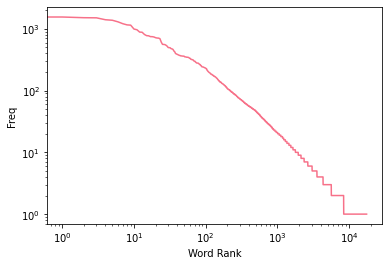

In [35]:
sorted_word_counts = sorted(list(word_count_dict1.values()), reverse=True)

with sns.color_palette("husl", 8): 
    plt.loglog(sorted_word_counts)
    plt.ylabel("Freq")
    plt.xlabel("Word Rank");

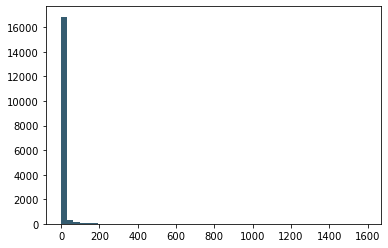

In [36]:
plt.hist(sorted_word_counts, bins=50, color = '#355c70');

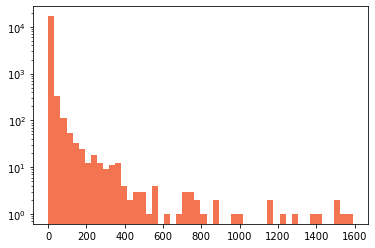

In [37]:
plt.hist(sorted_word_counts, bins=50, log=True, color = '#f37450' );

In [38]:
filtered_upper

['DE',
 'MÔMES',
 "D'OPÉRETTE",
 'DES',
 'GROTTES',
 'LASCAUX',
 'GRAFS',
 'LASCARDS',
 'FOOTELLES',
 'EN',
 'HERBE',
 'MOIS',
 'D¿AOÛT',
 'CULTURE',
 '2020',
 '¿',
 'MA',
 'VIE',
 'FRANK',
 'EHPADS',
 'AOUT2020',
 'VVV',
 'SORTIE',
 'JOURNÉE',
 'MOIS',
 'D¿AOÛT',
 'CULTURE',
 '2020',
 'ARBORETUM',
 'CLUB',
 'TOURNESOL',
 '9',
 'BÂTIR',
 'AVENIR',
 'VVV',
 '2020',
 'SOIRÉE',
 'SPORT',
 'JEUX',
 'SOUTIEN',
 "L'ACCESSIBILITÉ",
 'PERSONNES',
 'MALENTENDANTES',
 'LORS',
 'FORUM',
 'PHP',
 '2020',
 '22',
 '23',
 'OCT',
 '2020',
 'SALO',
 'VIII',
 'SALON',
 'DESSIN',
 'ÉROTIQUE',
 'SUBVENTION',
 'FONCTIONNEMENT',
 '2020',
 'SUBVENTION',
 'EXCEPTIONNELLE',
 'RÉALISATION',
 "D'UNE",
 'NOUVELLE',
 'ÉD',
 'TITRE',
 'DU',
 'PROJET',
 'MAISON',
 'SOLIDARITÉ',
 "L'ÉDUCATION",
 'CULTURE',
 'TOUS',
 'MOIS',
 'D¿AOÛT',
 'CULTURE',
 '2020',
 '¿',
 'IMAGINEZ',
 'EN',
 'AVANT',
 'FILLES',
 'PROJET',
 'COMMUNICATION',
 'CRÉATION',
 "D'AFFICHES",
 'PAILLARDE',
 'S',
 'AIDE',
 'CRÉATION',
 'DIFFUSION',
 'D¿

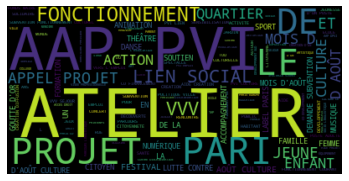

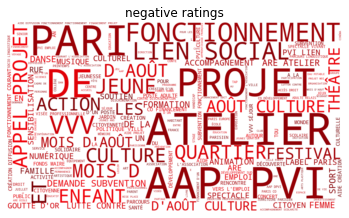

In [40]:
textneg = filtered_upper

#word cloud
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import urllib
import requests


textneg = ' '.join(textneg)

#color 
def random_color_func(word=None, font_size=None, position=None,  orientation=None, font_path=None, random_state=None):
    h = int(360.0 * 254.0 / 255.0) #change 2nr value here for color 
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(60, 120)) / 255.0)

    return "hsl({}, {}%, {}%)".format(h, s, l)

# Generate a word cloud image
wordcloud = WordCloud().generate(textneg)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(max_font_size=170, 
                      background_color="white",
                      stopwords=['JE','BONJOUR', 'CAR', 'SI', 'LE', "QU'IL", "J'AI"],
                      width=1280,
                      height=720,
                      color_func=random_color_func
                      ).generate(textneg) #change wordcloud origin here
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("negative ratings")
plt.show()
#wordcloud.to_file("foxy_NLTK_negative_ratings.png")

In [41]:
wordcloud.to_file("NEGATIVE.png")